# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
# !pip install wandb
# !pip3 install pytorch_lightning torchmetrics  

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [1]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: naevseev-work. Use `wandb login --relogin` to force relogin


True

In [2]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [3]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(13)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [58]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose(
    [
        transforms.RandomApply(transforms=[transforms.ColorJitter(brightness=1.0, contrast=0.5, saturation=1, hue=0.1)], p=0.2),
        transforms.RandomApply(transforms=[transforms.AugMix()], p=0.25),
        transforms.RandomApply(transforms=[transforms.Grayscale(num_output_channels=3)], p=0.07),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)
#(0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

#applier = transforms.RandomApply(transforms=[AugMix], p=0.5)

#transforms = transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter(), ]), p=0.3)


train_dataset = ImageFolder('/Users/nikitaevseev/Desktop/DS/DL/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/Users/nikitaevseev/Desktop/DS/DL/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=512, shuffle=True, num_workers=7, persistent_workers=True, multiprocessing_context='forkserver')
val_dataloader = DataLoader(val_dataset, batch_size=512, shuffle=False, num_workers=7, persistent_workers=True, multiprocessing_context='forkserver')

In [59]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


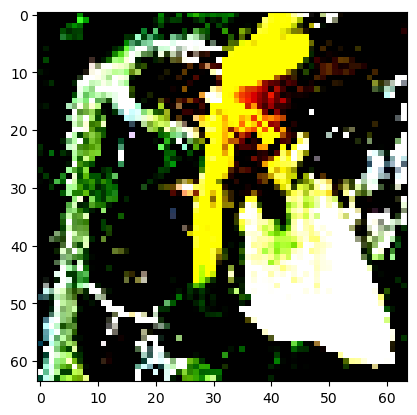

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


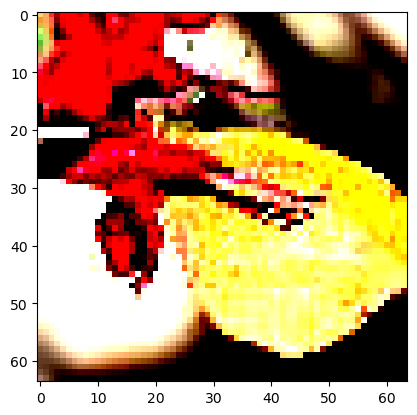

In [28]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[15].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [54]:
class YourNet(torch.nn.Module):
    def __init__(self, dropout):
        super().__init__()

        self.relu = torch.nn.ReLU()

        self.batch_norm1 = torch.nn.BatchNorm2d(16)
        self.batch_norm2 = torch.nn.BatchNorm2d(32)
        self.batch_norm3 = torch.nn.BatchNorm2d(64)
        self.batch_norm4 = torch.nn.BatchNorm1d(128)

        self.maxpool = torch.nn.MaxPool2d(2)

        self.conv1 = torch.nn.Conv2d(3, 16, 3)
        self.conv2 = torch.nn.Conv2d(16, 16, 3)
        self.conv3 = torch.nn.Conv2d(16, 32, 3)
        self.conv4 = torch.nn.Conv2d(32, 32, 3)
        self.conv5 = torch.nn.Conv2d(32, 64, 3)
        self.conv6 = torch.nn.Conv2d(64, 64, 3)

        self.flatten = nn.Flatten()
        self.linear1 = torch.nn.Linear(64 * 4 * 4, 128)
        self.output = torch.nn.Linear(128, 200)

        self.dropout = torch.nn.Dropout(p=dropout)

        # --------------
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()
        pass

    def _forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv5(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.batch_norm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        return self.output(x)

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [22]:
from transformers import ViTImageProcessor, ViTForImageClassification, ViTModel

#processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
#model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Загрузите предварительно обученный конфигурационный файл модели
model_name = "google/vit-base-patch16-224"
config = ViTModel.from_pretrained(model_name).config

# Установите свои параметры, например, количество классов и размер изображений
num_classes = 200
image_size = 64

# Создайте новую конфигурацию с вашими параметрами
config.vocab_size = num_classes
config.image_size = (image_size, image_size)

# Создайте новую модель на основе этой конфигурации
model = ViTForImageClassification(config)


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import transformers

# Скачайте модель vit-g/14

model = transformers.ViTForImageClassification.from_pretrained("google/vit-g-14", pretrained=False)

### Тренировочный класс lightning

In [55]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )  # сохраняет логи в папку, но можно несложно добавить wandb
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [42]:
trainer = pl.Trainer()

# Run learning rate finder
lr_finder = trainer.tuner.lr_find(model)

# Results can be found in
lr_finder.results

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/nikitaevseev/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


AttributeError: 'Trainer' object has no attribute 'tuner'

In [60]:
wandb_logger = WandbLogger\
    (log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

model = YourNet(dropout=0.4)#torchvision.models.maxvit_t(num_classes=200)
module = YourModule(model, learning_rate=0.001) # YOUR CODE HERE

# инициализируем проект
wandb.init(project="hw_02_exs1")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model)

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,██▆▇▆▄▅▆▅▇▆▅▃▅▄▅▄▄▆▆▅▄▆▃▂▂▃▅▄▄▃▃▂▃▂▄▃▂▃▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch,0
train_loss,4.8215
trainer/global_step,4799


[]

In [ ]:
trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

trainer.tune(module, train_dataloader, val_dataloader)

trainer.fit(module, train_dataloader, val_dataloader)

In [61]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=5)  # YOUR CODE HERE
trainer.fit(module, train_dataloader, val_dataloader)  # YOUR CODE HERE

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/nikitaevseev/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.

  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 229 K 
----------------------------------
229 K     Trainable params
0         Non-trainable params
229 K     Total params
0.918     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

python(2895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation: |          | 0/? [00:00<?, ?it/s]

python(2964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3066) MallocStackLoggin

Validation: |          | 0/? [00:00<?, ?it/s]

python(3237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3308) MallocStackLoggin

Validation: |          | 0/? [00:00<?, ?it/s]

python(3542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3605) MallocStackLoggin

Validation: |          | 0/? [00:00<?, ?it/s]

python(3845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
`Trainer.fit` stopped: `max_epochs=5` reached.


### Валидация результатов задания

In [62]:
def evaluate_task(model, test_dataloader):
    model = model
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images, labels
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

python(3949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [63]:
accuracy_score = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_score / 0.44, 0, 10):.2f} баллов")
print(accuracy_score)


python(3953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.python(3955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3989) MallocStackLoggin

Оценка за это задание составит 0.64 баллов
tensor(0.0283)


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE HERE
        pass

    def _forward(self, x):
        # runs the Neural Network
        # YOUR CODE HERE
        pass

    def forward(self, images, target=None):
        # YOUR CODE HERE
        pass

    def get_accuracy(self, reset=False):
        # YOUR CODE HERE
        pass

### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        # YOUR CODE HERE
        pass

    def forward(self, x):
        # YOUR CODE HERE
        pass

    def configure_optimizers(self):
        # YOUR CODE HERE
        pass

    def training_step(self, train_batch, batch_idx):
        # YOUR CODE HERE
        pass

    def validation_step(self, val_batch, batch_idx):
        # YOUR CODE HERE
        pass

In [ ]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device =  # YOUR CODE HERE

model = YourNet().to() # YOUR CODE HERE
module = YourModule() # YOUR CODE HERE

In [ ]:
trainer = pl.Trainer(logger=wandb_logger)  # YOUR CODE HERE
trainer.fit()  # YOUR CODE HERE

### Валидация результатов задания

In [ ]:
model = # Подгрузить свою сохраненную модель сюда

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.